In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Importation de la base de données segmentation


In [2]:
df_segmentation = pd.read_csv('DATA_PRETRAITEMENT/df_segmentation.csv')

In [3]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,AGE,GENDER,PROV
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000,80.0,M,ON
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000,60.0,F,MB
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333,47.0,F,QC
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.000000,39.0,NaN,QC
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202980,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000,67.0,F,ON
1202981,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000,62.0,F,QC
1202982,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000,62.0,NaN,ON
1202983,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667,33.0,NaN,ON


In [4]:
# verifier s'il y a des lignes dupliquées
df_segmentation.duplicated().sum()

0

In [5]:
# verifier s'il y a des valeurs manquantes 
df_segmentation.isnull().sum()[df_segmentation.isnull().sum() != 0]

AGE       175001
GENDER    400289
PROV       73871
dtype: int64

In [6]:
# On s'assure que chaque ligne contient un membre unique
assert df_segmentation.MEMBER_ID.nunique() == df_segmentation.shape[0]

In [7]:
#corr_matrix = df_segmentation.corr()

In [8]:
#corr_matrix[corr_matrix > 0.5]

In [9]:
#COPY pour garder les variables MEMBER_ID','AGE', 'GENDER', 'PROV'
df_segmentation_copy = df_segmentation.copy()
df_segmentation_copy_sociodem = df_segmentation_copy[['MEMBER_ID','AGE', 'GENDER', 'PROV']]
df_segmentation_copy_sociodem

,MEMBER_ID,AGE,GENDER,PROV
0,859615,80.0,M,ON
1,12684534,60.0,F,MB
2,14130778,47.0,F,QC
3,18899440,39.0,NaN,QC
4,1011315776,NaN,NaN,NaN
...,...,...,...,...
1202980,1982154,67.0,F,ON
1202981,5806235,62.0,F,QC
1202982,17171682,62.0,NaN,ON
1202983,18475293,33.0,NaN,ON


In [10]:
##effacer colonnes sociodemographiques
df_segmentation.drop(['AGE', 'GENDER', 'PROV'], axis=1, inplace=True)

In [11]:
# Vérifier que toutes les colonnes sont bien numériques
assert len(df_segmentation.select_dtypes(include=np.number).columns) == df_segmentation.shape[1]

In [12]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.000000
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202980,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
1202981,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
1202982,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
1202983,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


# Segmentation Manuelle


## Cibler les membres pct negatif
Nom du segment : <span style="background-color:yellow"> membres en decroissance </span>

In [13]:
df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1)[(df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1) < 0).any(1)]

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,REDEMPTIONS,NUMBER_ITEMS_REDEEMED
108,1016151192,42,0,0,-819.0,819.0,0.0,0.0,240.0,1.0,0.0,0.0
414,1003564522,144,0,0,-1442.0,0.0,-1442.0,0.0,420.0,1.0,0.0,0.0
610,18142324,201,0,0,-64.0,0.0,-64.0,0.0,1050.0,1.0,0.0,0.0
724,2359361,365,156,9105,506.0,814.0,-15.0,1335.0,0.0,5.0,9.0,12.0
1302,1012968014,76,0,0,-1339.0,15.0,-1324.0,0.0,180.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1202051,10357139,278,64,80,931.0,949.0,-50.0,1930.0,0.0,4.0,6.0,20.0
1202273,1008728761,99,0,180,-757.0,0.0,-757.0,0.0,0.0,2.0,0.0,0.0
1202286,1709724,297,0,752,-411.0,21.0,-390.0,0.0,120.0,5.0,0.0,0.0
1202324,2673095,352,93,522,-595.0,220.0,-375.0,0.0,0.0,5.0,3.0,9.0


In [14]:
df_segmentation[(df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1) < 0).any(1)]

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
108,1016151192,42,0,0,-819.0,819.0,0.0,0.0,240.0,1.0,-0.583333,0.0,0.0,0.000
414,1003564522,144,0,0,-1442.0,0.0,-1442.0,0.0,420.0,1.0,-0.583333,0.0,0.0,0.000
610,18142324,201,0,0,-64.0,0.0,-64.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.000
724,2359361,365,156,9105,506.0,814.0,-15.0,1335.0,0.0,5.0,-0.752294,9.0,12.0,0.000
1302,1012968014,76,0,0,-1339.0,15.0,-1324.0,0.0,180.0,1.0,-0.090909,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202051,10357139,278,64,80,931.0,949.0,-50.0,1930.0,0.0,4.0,-0.691176,6.0,20.0,0.000
1202273,1008728761,99,0,180,-757.0,0.0,-757.0,0.0,0.0,2.0,-0.625000,0.0,0.0,0.000
1202286,1709724,297,0,752,-411.0,21.0,-390.0,0.0,120.0,5.0,-0.379310,0.0,0.0,0.000
1202324,2673095,352,93,522,-595.0,220.0,-375.0,0.0,0.0,5.0,-0.876712,3.0,9.0,-0.875


In [15]:

segment_negatif_0 = df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1)[(df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1) < 0).any(1)]
segment_negatif_0

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,REDEMPTIONS,NUMBER_ITEMS_REDEEMED
108,1016151192,42,0,0,-819.0,819.0,0.0,0.0,240.0,1.0,0.0,0.0
414,1003564522,144,0,0,-1442.0,0.0,-1442.0,0.0,420.0,1.0,0.0,0.0
610,18142324,201,0,0,-64.0,0.0,-64.0,0.0,1050.0,1.0,0.0,0.0
724,2359361,365,156,9105,506.0,814.0,-15.0,1335.0,0.0,5.0,9.0,12.0
1302,1012968014,76,0,0,-1339.0,15.0,-1324.0,0.0,180.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1202051,10357139,278,64,80,931.0,949.0,-50.0,1930.0,0.0,4.0,6.0,20.0
1202273,1008728761,99,0,180,-757.0,0.0,-757.0,0.0,0.0,2.0,0.0,0.0
1202286,1709724,297,0,752,-411.0,21.0,-390.0,0.0,120.0,5.0,0.0,0.0
1202324,2673095,352,93,522,-595.0,220.0,-375.0,0.0,0.0,5.0,3.0,9.0


In [16]:
#AJOUTER VARIABLES SOCIODEMOGRAPHIQUES 
segment_negatif = pd.merge(segment_negatif_0, df_segmentation_copy_sociodem, on = "MEMBER_ID", how = "inner")
segment_negatif

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,AGE,GENDER,PROV
0,1016151192,42,0,0,-819.0,819.0,0.0,0.0,240.0,1.0,0.0,0.0,NaN,NaN,AB
1,1003564522,144,0,0,-1442.0,0.0,-1442.0,0.0,420.0,1.0,0.0,0.0,NaN,M,ON
2,18142324,201,0,0,-64.0,0.0,-64.0,0.0,1050.0,1.0,0.0,0.0,NaN,F,BC
3,2359361,365,156,9105,506.0,814.0,-15.0,1335.0,0.0,5.0,9.0,12.0,59.0,M,ON
4,1012968014,76,0,0,-1339.0,15.0,-1324.0,0.0,180.0,1.0,0.0,0.0,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,10357139,278,64,80,931.0,949.0,-50.0,1930.0,0.0,4.0,6.0,20.0,48.0,F,ON
5297,1008728761,99,0,180,-757.0,0.0,-757.0,0.0,0.0,2.0,0.0,0.0,66.0,F,MB
5298,1709724,297,0,752,-411.0,21.0,-390.0,0.0,120.0,5.0,0.0,0.0,64.0,F,ON
5299,2673095,352,93,522,-595.0,220.0,-375.0,0.0,0.0,5.0,3.0,9.0,40.0,NaN,AB


In [17]:
ind_neg_to_remove = df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1)[(df_segmentation.drop(['COVID_TRANSACTIONS_PCT_CHANGE','PTS_RDMED_PCT_CHANGE_2020_2021'], axis=1) < 0).any(1)].index

In [18]:
df_segmentation.drop(ind_neg_to_remove, inplace=True)

In [19]:
df_segmentation.reset_index(inplace=True, drop=True)

In [20]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.000000
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197679,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
1197680,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
1197681,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
1197682,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


## Cibler les membres mono-catégorie 
membres qui achètent uniquement auprès d'un seul retailer (covid/pas covid) <br>
nom du segment : <span style="background-color:yellow"> membres mono-catégorie </span>

In [21]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.000000
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197679,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
1197680,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
1197681,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
1197682,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


In [22]:
# --- membres n'achètent que dans une seule catégorie

df_segmentation[df_segmentation.NB_CATG_PURCHASED_FROM == 1]

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.00
9,1000679667,182,0,4287,183.0,0.0,183.0,0.0,330.0,1.0,-0.125000,0.0,0.0,0.00
12,2093013,284,0,0,15.0,0.0,15.0,0.0,660.0,1.0,0.000000,0.0,0.0,0.00
22,13389946,241,0,107,91.0,0.0,91.0,0.0,30.0,1.0,-0.500000,0.0,0.0,0.00
28,1010199261,96,0,170,55.0,0.0,55.0,0.0,360.0,1.0,-0.410256,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197652,1005054029,127,0,0,29.0,120.0,149.0,0.0,930.0,1.0,0.000000,0.0,0.0,0.00
1197656,1010744056,90,0,1372,516.0,14.0,530.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.00
1197663,9540143,284,3,684,1506.0,3572.0,0.0,5078.0,0.0,1.0,0.269091,21.0,35.0,-0.95
1197667,18752214,188,0,0,89.0,12.0,101.0,0.0,420.0,1.0,-0.424138,0.0,0.0,0.00


In [23]:
segment_mono_categorie_0 = df_segmentation[df_segmentation.NB_CATG_PURCHASED_FROM == 1]
segment_mono_categorie_0

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
4,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.00
9,1000679667,182,0,4287,183.0,0.0,183.0,0.0,330.0,1.0,-0.125000,0.0,0.0,0.00
12,2093013,284,0,0,15.0,0.0,15.0,0.0,660.0,1.0,0.000000,0.0,0.0,0.00
22,13389946,241,0,107,91.0,0.0,91.0,0.0,30.0,1.0,-0.500000,0.0,0.0,0.00
28,1010199261,96,0,170,55.0,0.0,55.0,0.0,360.0,1.0,-0.410256,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197652,1005054029,127,0,0,29.0,120.0,149.0,0.0,930.0,1.0,0.000000,0.0,0.0,0.00
1197656,1010744056,90,0,1372,516.0,14.0,530.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.00
1197663,9540143,284,3,684,1506.0,3572.0,0.0,5078.0,0.0,1.0,0.269091,21.0,35.0,-0.95
1197667,18752214,188,0,0,89.0,12.0,101.0,0.0,420.0,1.0,-0.424138,0.0,0.0,0.00


In [24]:
#AJOUTER VARIABLES SOCIODEMOGRAPHIQUES 
segment_mono_categorie = pd.merge(segment_mono_categorie_0, df_segmentation_copy_sociodem, on = "MEMBER_ID", how = "inner")
segment_mono_categorie

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,AGE,GENDER,PROV
0,1011315776,47,0,0,1.0,0.0,1.0,0.0,1050.0,1.0,0.000000,0.0,0.0,0.00,NaN,NaN,NaN
1,1000679667,182,0,4287,183.0,0.0,183.0,0.0,330.0,1.0,-0.125000,0.0,0.0,0.00,60.0,NaN,BC
2,2093013,284,0,0,15.0,0.0,15.0,0.0,660.0,1.0,0.000000,0.0,0.0,0.00,65.0,F,ON
3,13389946,241,0,107,91.0,0.0,91.0,0.0,30.0,1.0,-0.500000,0.0,0.0,0.00,49.0,F,ON
4,1010199261,96,0,170,55.0,0.0,55.0,0.0,360.0,1.0,-0.410256,0.0,0.0,0.00,44.0,F,ON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184873,1005054029,127,0,0,29.0,120.0,149.0,0.0,930.0,1.0,0.000000,0.0,0.0,0.00,58.0,M,BC
184874,1010744056,90,0,1372,516.0,14.0,530.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.00,NaN,NaN,QC
184875,9540143,284,3,684,1506.0,3572.0,0.0,5078.0,0.0,1.0,0.269091,21.0,35.0,-0.95,NaN,NaN,ON
184876,18752214,188,0,0,89.0,12.0,101.0,0.0,420.0,1.0,-0.424138,0.0,0.0,0.00,80.0,M,ON


In [25]:
ind_cat_to_remove = df_segmentation[df_segmentation.NB_CATG_PURCHASED_FROM == 1].index

In [26]:
df_segmentation.drop(ind_cat_to_remove, inplace=True)

In [27]:
df_segmentation.reset_index(inplace=True, drop=True)

In [28]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.000000
4,16081825,224,49,1820,140.0,69.0,0.0,209.0,0.0,4.0,-0.584000,3.0,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012801,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
1012802,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
1012803,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
1012804,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


## Cibler les membres qui n'ont pas acheté depuis 1 an
Segments des membres qui n'ont pas fait une transaction depuis plus de 365 jours <br>
nom du segment : <span style="background-color:yellow"> membres inactifs </span>

In [29]:
# --- clients n'ont pas fait de transaction depuis 1 an
df_segmentation[df_segmentation.NB_J_DEPUIS_DERNIERE_TRANSACTION > 365]

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.0
5,1005618151,118,638,623,16.0,5.0,8.0,13.0,420.0,3.0,-0.428571,1.0,1.0,0.0
13,1003072319,151,0,0,64.0,0.0,64.0,0.0,780.0,2.0,0.000000,0.0,0.0,0.0
20,1012108390,36,0,37,1.0,35.0,36.0,0.0,660.0,2.0,0.000000,0.0,0.0,0.0
21,15320378,230,0,0,66.0,20.0,86.0,0.0,750.0,3.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012740,1013125436,73,24,15,65.0,55.0,0.0,120.0,510.0,4.0,-0.888889,2.0,2.0,0.0
1012763,1008009016,92,0,0,4.0,0.0,0.0,4.0,900.0,2.0,0.000000,0.0,0.0,0.0
1012767,2792431,338,0,3,9.0,0.0,9.0,0.0,900.0,2.0,0.000000,0.0,0.0,0.0
1012768,14835959,230,0,0,53.0,28.0,81.0,0.0,690.0,4.0,0.000000,0.0,0.0,0.0


In [30]:
segment_inactif_0 = df_segmentation[df_segmentation.NB_J_DEPUIS_DERNIERE_TRANSACTION > 365]
segment_inactif_0

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
3,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.0
5,1005618151,118,638,623,16.0,5.0,8.0,13.0,420.0,3.0,-0.428571,1.0,1.0,0.0
13,1003072319,151,0,0,64.0,0.0,64.0,0.0,780.0,2.0,0.000000,0.0,0.0,0.0
20,1012108390,36,0,37,1.0,35.0,36.0,0.0,660.0,2.0,0.000000,0.0,0.0,0.0
21,15320378,230,0,0,66.0,20.0,86.0,0.0,750.0,3.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012740,1013125436,73,24,15,65.0,55.0,0.0,120.0,510.0,4.0,-0.888889,2.0,2.0,0.0
1012763,1008009016,92,0,0,4.0,0.0,0.0,4.0,900.0,2.0,0.000000,0.0,0.0,0.0
1012767,2792431,338,0,3,9.0,0.0,9.0,0.0,900.0,2.0,0.000000,0.0,0.0,0.0
1012768,14835959,230,0,0,53.0,28.0,81.0,0.0,690.0,4.0,0.000000,0.0,0.0,0.0


In [31]:
#AJOUTER VARIABLES SOCIODEMOGRAPHIQUES 
segment_inactif = pd.merge(segment_inactif_0, df_segmentation_copy_sociodem, on = "MEMBER_ID", how = "inner")
segment_inactif

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,AGE,GENDER,PROV
0,18899440,185,0,7,11.0,0.0,11.0,0.0,750.0,2.0,0.000000,0.0,0.0,0.0,39.0,NaN,QC
1,1005618151,118,638,623,16.0,5.0,8.0,13.0,420.0,3.0,-0.428571,1.0,1.0,0.0,56.0,M,ON
2,1003072319,151,0,0,64.0,0.0,64.0,0.0,780.0,2.0,0.000000,0.0,0.0,0.0,NaN,M,SK
3,1012108390,36,0,37,1.0,35.0,36.0,0.0,660.0,2.0,0.000000,0.0,0.0,0.0,19.0,F,SK
4,15320378,230,0,0,66.0,20.0,86.0,0.0,750.0,3.0,0.000000,0.0,0.0,0.0,42.0,M,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109781,1013125436,73,24,15,65.0,55.0,0.0,120.0,510.0,4.0,-0.888889,2.0,2.0,0.0,31.0,F,AB
109782,1008009016,92,0,0,4.0,0.0,0.0,4.0,900.0,2.0,0.000000,0.0,0.0,0.0,42.0,M,QC
109783,2792431,338,0,3,9.0,0.0,9.0,0.0,900.0,2.0,0.000000,0.0,0.0,0.0,50.0,F,SK
109784,14835959,230,0,0,53.0,28.0,81.0,0.0,690.0,4.0,0.000000,0.0,0.0,0.0,71.0,M,ON


In [32]:
ind_rec_to_remove = df_segmentation[df_segmentation.NB_J_DEPUIS_DERNIERE_TRANSACTION > 365].index

In [33]:
df_segmentation.drop(ind_rec_to_remove, inplace=True)

In [34]:
df_segmentation.reset_index(inplace=True, drop=True)

In [35]:
df_segmentation

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,16081825,224,49,1820,140.0,69.0,0.0,209.0,0.0,4.0,-0.584000,3.0,3.0,0.000000
4,3148856,369,0,3425,2909.0,2302.0,5211.0,0.0,0.0,5.0,0.197183,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903015,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
903016,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
903017,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
903018,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


# standardisation des données

In [36]:
#garder les member id dans une copie qui va etre utilise au final
segment_k_means = df_segmentation.copy()
segment_k_means

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333
3,16081825,224,49,1820,140.0,69.0,0.0,209.0,0.0,4.0,-0.584000,3.0,3.0,0.000000
4,3148856,369,0,3425,2909.0,2302.0,5211.0,0.0,0.0,5.0,0.197183,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903015,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000
903016,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000
903017,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000
903018,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667


In [37]:
#effacer MEMBER_ID
df_segmentation.drop('MEMBER_ID', axis=1, inplace=True)

In [38]:
# scaler = StandardScaler() 
scaler = MinMaxScaler()

In [39]:
arr_segmentation_scaled = scaler.fit_transform(df_segmentation)

In [40]:
df_segmentation_scaled = pd.DataFrame(arr_segmentation_scaled, columns=df_segmentation.columns)

In [41]:
df_segmentation_scaled

,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
0,0.972973,0.000089,0.000647,0.000212,0.000424,0.000000,0.000604,0.0,0.666667,0.000384,0.005612,0.000706,0.003760
1,0.686486,0.000000,0.000427,0.000115,0.000059,0.000214,0.000000,0.0,0.833333,0.000011,0.001122,0.000141,0.003760
2,0.632432,0.000739,0.000198,0.000460,0.000694,0.000000,0.001148,0.0,0.666667,0.000268,0.003367,0.001412,0.002503
3,0.600000,0.000312,0.001853,0.000133,0.000127,0.000000,0.000278,0.0,0.666667,0.000148,0.003367,0.000424,0.003760
4,0.991892,0.000000,0.003486,0.002758,0.004240,0.007275,0.000000,0.0,0.833333,0.000425,0.000000,0.000000,0.003760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903015,0.772973,0.000000,0.001020,0.000083,0.000103,0.000201,0.000000,0.0,0.666667,0.000302,0.000000,0.000000,0.003760
903016,0.943243,0.001185,0.000337,0.000155,0.000136,0.000000,0.000317,0.0,0.666667,0.000091,0.001122,0.000141,0.003760
903017,0.559459,0.000000,0.001861,0.000121,0.000046,0.000214,0.000000,0.0,0.500000,0.000822,0.000000,0.000000,0.003760
903018,0.491892,0.000089,0.000949,0.001974,0.000232,0.000648,0.002322,0.0,1.000000,0.000271,0.006734,0.002401,0.001246


# Analyse en composantes principales (PCA)


In [42]:
pca = PCA(n_components=0.95, random_state=42)

In [43]:
arr_pca_scaled = pca.fit_transform(df_segmentation_scaled)

In [44]:
df_pca_scaled = pd.DataFrame(arr_pca_scaled)

In [45]:
df_pca_scaled

,0,1,2
0,-0.436936,0.038602,0.076620
1,-0.219641,-0.100291,-0.131553
2,-0.126036,-0.086372,0.015866
3,-0.096432,-0.098272,0.010078
4,-0.498508,0.011773,-0.077140
...,...,...,...
903015,-0.254330,-0.034778,0.040959
903016,-0.409777,0.027707,0.071336
903017,-0.015143,-0.079370,0.159936
903018,-0.086285,-0.205503,-0.323392


In [46]:
df_pca_scaled.shape

(903020, 3)

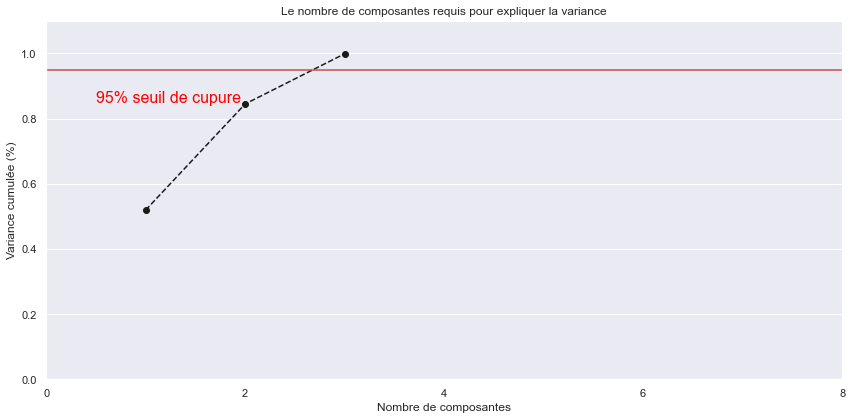

In [47]:
import seaborn as sns
sns.set()
# À inclure dans le rapport
pca = PCA(0.95, random_state=42).fit(df_segmentation_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='k')

plt.xlabel('Nombre de composantes')
plt.xticks(np.arange(0, 10, step=2)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Variance cumulée (%)')
plt.title('Le nombre de composantes requis pour expliquer la variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% seuil de cupure', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.show()

# KMeans Clustering

In [48]:
# Determine which number of k is optimal using the elbow method
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(df_pca_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

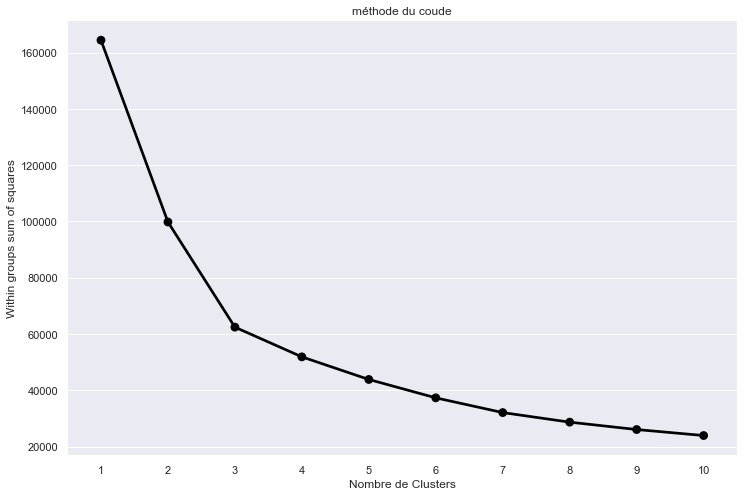

In [49]:
plt.figure(figsize=(12,8))
plt.title('méthode du coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Within groups sum of squares')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), color = 'black')
plt.show()

In [50]:
model = KMeans(n_clusters=2, random_state=42)

In [51]:
y_km = model.fit_predict(df_pca_scaled)

In [52]:
y_km

array([1, 1, 1, ..., 1, 1, 0])

In [53]:
# Chaque individu est bien assigné à un cluster 
assert len(y_km) == df_pca_scaled.shape[0]

In [54]:
segment_k_means['CLUSTER'] = y_km

In [55]:
segment_k_means

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,CLUSTER
0,859615,362,14,636,224.0,230.0,0.0,454.0,0.0,4.0,0.081967,5.0,5.0,0.000000,1
1,12684534,256,0,419,121.0,32.0,153.0,0.0,0.0,5.0,-0.969697,1.0,1.0,0.000000,1
2,14130778,236,116,195,485.0,377.0,0.0,862.0,0.0,4.0,-0.244681,3.0,10.0,-0.333333,1
3,16081825,224,49,1820,140.0,69.0,0.0,209.0,0.0,4.0,-0.584000,3.0,3.0,0.000000,1
4,3148856,369,0,3425,2909.0,2302.0,5211.0,0.0,0.0,5.0,0.197183,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903015,1982154,288,0,1002,88.0,56.0,144.0,0.0,0.0,4.0,-0.148148,0.0,0.0,0.000000,1
903016,5806235,351,186,331,164.0,74.0,0.0,238.0,0.0,4.0,-0.744186,1.0,1.0,0.000000,1
903017,17171682,209,0,1828,128.0,25.0,153.0,0.0,0.0,3.0,1.315789,0.0,0.0,0.000000,1
903018,18475293,184,14,932,2082.0,126.0,464.0,1744.0,0.0,6.0,-0.236842,6.0,17.0,-0.666667,1


In [56]:
# On détermine la taille de nos segments
segment_k_means.CLUSTER.value_counts() 

1    506552
0    396468
Name: CLUSTER, dtype: int64

In [57]:
# On détermine le pourcentage que chacun de nos segments détient
segment_k_means.CLUSTER.value_counts() / segment_k_means.shape[0] * 100

1    56.095325
0    43.904675
Name: CLUSTER, dtype: float64

In [58]:
segment_k_means.groupby('CLUSTER').mean()

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021
CLUSTER,,,,,,,,,,,,,,
0,9.444654e+08,96.235797,131.360266,892.878414,496.336136,355.098139,481.152022,370.282252,63.986274,3.438290,0.467446,1.719869,2.770143,0.012055
1,4.377248e+07,288.528198,150.610022,3191.843136,1452.021250,776.254471,1584.487693,643.788028,28.176851,4.053955,-0.045333,3.000111,5.536198,0.058153


Nom du segment 0: <span style="background-color:yellow"> membres boostés par la Covid-19 </span> <br>
Nom du segment 1: <span style="background-color:yellow"> membres fidèles </span>

In [59]:
pd.set_option('float_format', '{:f}'.format)

In [60]:
segment_k_means[segment_k_means.CLUSTER == 1].describe()[['TENURE_MONTHS', 'REWARD_POINTS_BALANCE', 'BASE_POINTS_EARNED', 'BONUS_POINTS_EARNED', 'NB_CATG_PURCHASED_FROM']]

,TENURE_MONTHS,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,NB_CATG_PURCHASED_FROM
count,506552.000000,506552.000000,506552.000000,506552.000000,506552.000000
mean,288.528198,3191.843136,1452.021250,776.254471,4.053955
std,54.279854,6948.539155,5539.433354,2483.314890,1.083388
min,156.000000,0.000000,0.000000,0.000000,0.000000
25%,247.000000,328.000000,136.000000,45.000000,3.000000
50%,292.000000,1301.000000,370.000000,180.000000,4.000000
75%,339.000000,3384.000000,958.000000,604.000000,5.000000
max,372.000000,610381.000000,1054692.000000,542866.000000,6.000000


In [61]:
segment_k_means[segment_k_means.CLUSTER == 0].describe()[['TENURE_MONTHS', 'REWARD_POINTS_BALANCE', 'COVID_TRANSACTIONS_PCT_CHANGE', 'PTS_RDMED_PCT_CHANGE_2020_2021']]

,TENURE_MONTHS,REWARD_POINTS_BALANCE,COVID_TRANSACTIONS_PCT_CHANGE,PTS_RDMED_PCT_CHANGE_2020_2021
count,396468.000000,396468.000000,396468.000000,396468.000000
mean,96.235797,892.878414,0.467446,0.012055
std,53.435605,3173.539139,7.568416,0.863775
min,2.000000,0.000000,-0.999755,-0.995000
25%,52.000000,0.000000,-0.461538,0.000000
50%,90.000000,152.000000,-0.083333,0.000000
75%,135.000000,833.000000,0.090909,0.000000
max,275.000000,982394.000000,2815.304348,104.760000


In [62]:
#AJOUTER VARIABLES SOCIODEMOGRAPHIQUES 
segment_k_means = pd.merge(segment_k_means, df_segmentation_copy_sociodem, on = "MEMBER_ID", how = "inner")
segment_k_means

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,CLUSTER,AGE,GENDER,PROV
0,859615,362,14,636,224.000000,230.000000,0.000000,454.000000,0.000000,4.000000,0.081967,5.000000,5.000000,0.000000,1,80.000000,M,ON
1,12684534,256,0,419,121.000000,32.000000,153.000000,0.000000,0.000000,5.000000,-0.969697,1.000000,1.000000,0.000000,1,60.000000,F,MB
2,14130778,236,116,195,485.000000,377.000000,0.000000,862.000000,0.000000,4.000000,-0.244681,3.000000,10.000000,-0.333333,1,47.000000,F,QC
3,16081825,224,49,1820,140.000000,69.000000,0.000000,209.000000,0.000000,4.000000,-0.584000,3.000000,3.000000,0.000000,1,65.000000,F,ON
4,3148856,369,0,3425,2909.000000,2302.000000,5211.000000,0.000000,0.000000,5.000000,0.197183,0.000000,0.000000,0.000000,1,64.000000,NaN,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903015,1982154,288,0,1002,88.000000,56.000000,144.000000,0.000000,0.000000,4.000000,-0.148148,0.000000,0.000000,0.000000,1,67.000000,F,ON
903016,5806235,351,186,331,164.000000,74.000000,0.000000,238.000000,0.000000,4.000000,-0.744186,1.000000,1.000000,0.000000,1,62.000000,F,QC
903017,17171682,209,0,1828,128.000000,25.000000,153.000000,0.000000,0.000000,3.000000,1.315789,0.000000,0.000000,0.000000,1,62.000000,NaN,ON
903018,18475293,184,14,932,2082.000000,126.000000,464.000000,1744.000000,0.000000,6.000000,-0.236842,6.000000,17.000000,-0.666667,1,33.000000,NaN,ON


In [63]:
segment_mono_categorie['CLUSTER'] = 2

In [64]:
segment_inactif['CLUSTER'] = 3

In [65]:
segment_negatif['CLUSTER'] = 4

In [66]:
segmentation_concat =pd.concat([segment_k_means, segment_mono_categorie, segment_inactif, segment_negatif])

In [67]:
segmentation_concat

,MEMBER_ID,TENURE_MONTHS,CASH_BACK_POINTS_BALANCE,REWARD_POINTS_BALANCE,BASE_POINTS_EARNED,BONUS_POINTS_EARNED,REWARD_POINTS_EARNED,CASH_BACK_POINTS_EARNED,NB_J_DEPUIS_DERNIERE_TRANSACTION,NB_CATG_PURCHASED_FROM,COVID_TRANSACTIONS_PCT_CHANGE,REDEMPTIONS,NUMBER_ITEMS_REDEEMED,PTS_RDMED_PCT_CHANGE_2020_2021,CLUSTER,AGE,GENDER,PROV
0,859615,362,14,636,224.000000,230.000000,0.000000,454.000000,0.000000,4.000000,0.081967,5.000000,5.000000,0.000000,1,80.000000,M,ON
1,12684534,256,0,419,121.000000,32.000000,153.000000,0.000000,0.000000,5.000000,-0.969697,1.000000,1.000000,0.000000,1,60.000000,F,MB
2,14130778,236,116,195,485.000000,377.000000,0.000000,862.000000,0.000000,4.000000,-0.244681,3.000000,10.000000,-0.333333,1,47.000000,F,QC
3,16081825,224,49,1820,140.000000,69.000000,0.000000,209.000000,0.000000,4.000000,-0.584000,3.000000,3.000000,0.000000,1,65.000000,F,ON
4,3148856,369,0,3425,2909.000000,2302.000000,5211.000000,0.000000,0.000000,5.000000,0.197183,0.000000,0.000000,0.000000,1,64.000000,NaN,MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,10357139,278,64,80,931.000000,949.000000,-50.000000,1930.000000,0.000000,4.000000,NaN,6.000000,20.000000,NaN,4,48.000000,F,ON
5297,1008728761,99,0,180,-757.000000,0.000000,-757.000000,0.000000,0.000000,2.000000,NaN,0.000000,0.000000,NaN,4,66.000000,F,MB
5298,1709724,297,0,752,-411.000000,21.000000,-390.000000,0.000000,120.000000,5.000000,NaN,0.000000,0.000000,NaN,4,64.000000,F,ON
5299,2673095,352,93,522,-595.000000,220.000000,-375.000000,0.000000,0.000000,5.000000,NaN,3.000000,9.000000,NaN,4,40.000000,NaN,AB


# CSV segmentations manuelles et kmeans

In [68]:
output_to_csv = True

In [69]:
if output_to_csv:
    segment_negatif.to_csv('SEGMENTS/segment_negatif.csv', index=False)

In [70]:
if output_to_csv:
    segment_mono_categorie.to_csv('SEGMENTS/segment_mono_categorie.csv', index=False)

In [71]:
if output_to_csv:
    segment_inactif.to_csv('SEGMENTS/segment_inactif.csv', index=False)

In [72]:
if output_to_csv:
    segment_k_means.to_csv('SEGMENTS/segment_k_means.csv', index=False)

In [73]:
#fichier qui concatene toutes les segments
if output_to_csv:
    segmentation_concat.to_csv('SEGMENTS/segmentation_concat.csv', index=False)